<h3 style="background-color:#CAC6B9;"> <center> <h1>Deep Neural Network(DNN), Logistic Regression, Decision Tree, Random Forest, XGBoost</h1> <center> </h3>

# Read Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Dataset/train.csv")
test_data = pd.read_csv("Dataset/test.csv")

# Train and Test data info

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [5]:
train_data.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
print(train_data.shape)
print(test_data.shape)

print('Features : ', train_data.columns.values)
print('Features : ', test_data.columns.values)
train_data.head()

(381109, 12)
(127037, 11)
Features :  ['id' 'Gender' 'Age' 'Driving_License' 'Region_Code' 'Previously_Insured'
 'Vehicle_Age' 'Vehicle_Damage' 'Annual_Premium' 'Policy_Sales_Channel'
 'Vintage' 'Response']
Features :  ['id' 'Gender' 'Age' 'Driving_License' 'Region_Code' 'Previously_Insured'
 'Vehicle_Age' 'Vehicle_Damage' 'Annual_Premium' 'Policy_Sales_Channel'
 'Vintage']


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Any Null Values??

In [7]:
train_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
test_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

# Checking unique values

In [9]:
train_data.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

# Visualizing data

In [10]:
train_data["Response"].value_counts(normalize= True)

0    0.877437
1    0.122563
Name: Response, dtype: float64

<h2> Here we can see in our target feature 88% values are '0' and 12% values are '1' <h2>

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

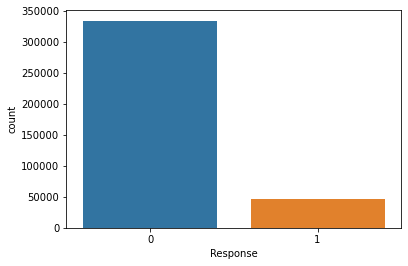

In [11]:
sns.countplot(train_data["Response"])

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Driving_License'}>],
       [<AxesSubplot:title={'center':'Region_Code'}>,
        <AxesSubplot:title={'center':'Previously_Insured'}>,
        <AxesSubplot:title={'center':'Annual_Premium'}>],
       [<AxesSubplot:title={'center':'Policy_Sales_Channel'}>,
        <AxesSubplot:title={'center':'Vintage'}>,
        <AxesSubplot:title={'center':'Response'}>]], dtype=object)

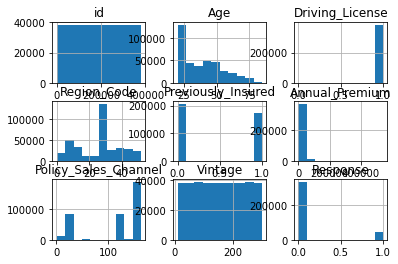

In [12]:
train_data.hist()

<h2> Visualization of the density of Age</h2>

In [13]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show

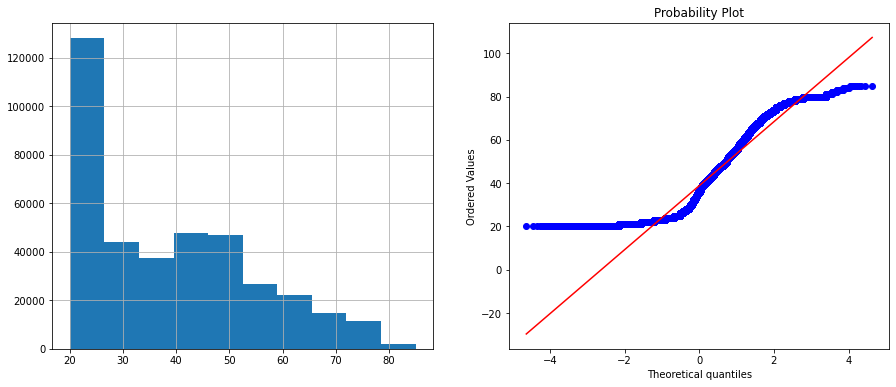

In [14]:
diagnostic_plots(train_data, 'Age')

### Logarithmic Transformation

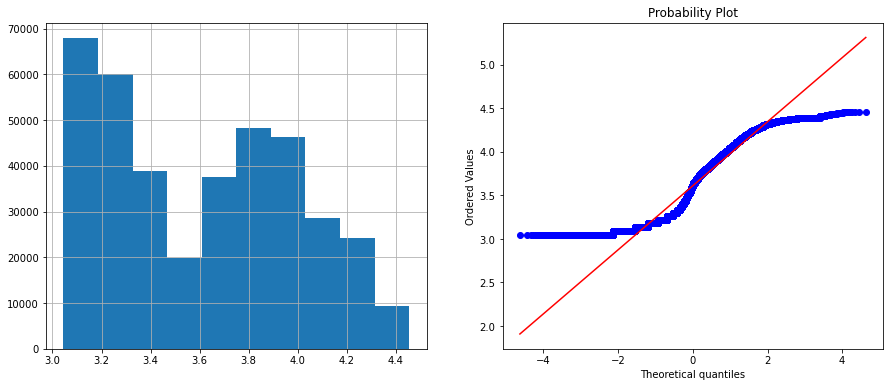

In [15]:
train_data['Age'] = np.log(train_data['Age']+1)
diagnostic_plots(train_data,'Age')

<AxesSubplot:ylabel='Age'>

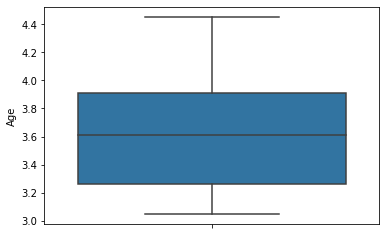

In [16]:
sns.boxplot(y = 'Age', data = train_data)

<h2> Visualization of Annual_Premium with respect to Age</h2>

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

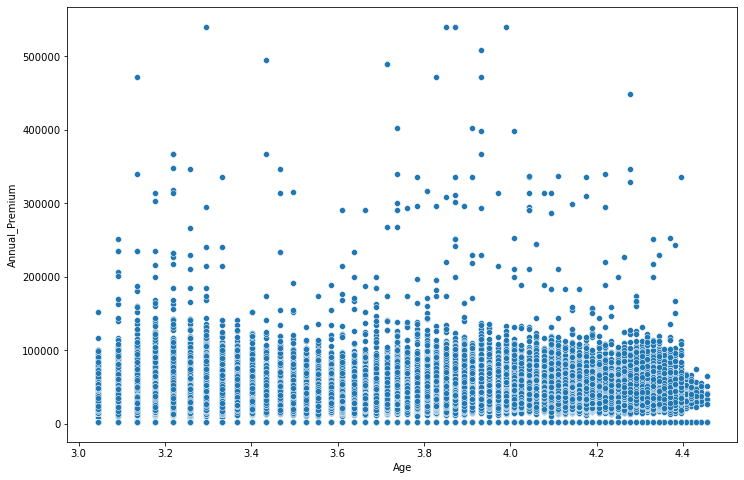

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train_data['Age'],y=train_data['Annual_Premium'])

<h2> Gender, Previously_insuranced, Vehicle_age, Vehicle_damage value count visualization </h2>

### Exponential Transformation

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

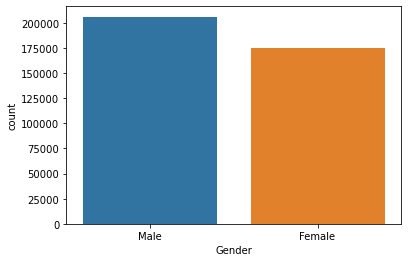

In [18]:
sns.countplot(train_data.Gender)

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

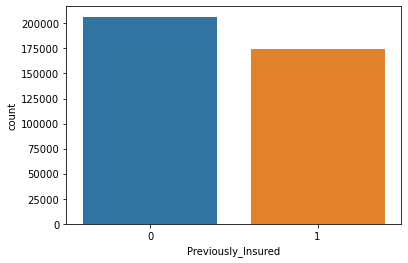

In [19]:
sns.countplot(train_data.Previously_Insured)

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

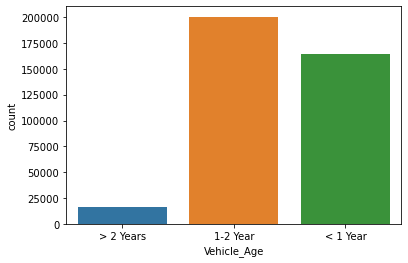

In [20]:
sns.countplot(train_data.Vehicle_Age)

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

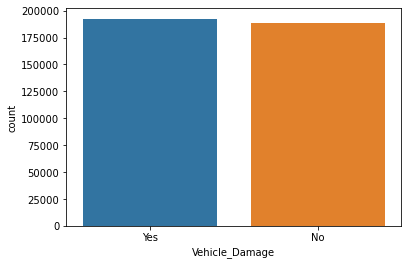

In [21]:
sns.countplot(train_data.Vehicle_Damage)

<h2> Visualizing density of Annual_premium by distplot </h2>

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

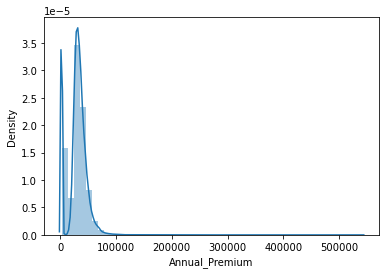

In [22]:
sns.distplot(train_data.Annual_Premium)

<h2> Boxplot of annual premium. We can see that annual premium has outliers. </h2>

<AxesSubplot:ylabel='Annual_Premium'>

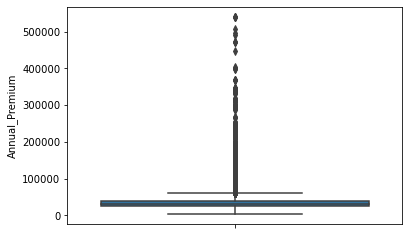

In [23]:
sns.boxplot(y = 'Annual_Premium', data = train_data)

<h2> Calculating the upper bound and lower bound. The range of values that are not outlier. </h2>

In [24]:
has_outliers = ['Annual_Premium']
up_outliers = []
low_outliers = []

def max_value(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])


for col in has_outliers:
    IQR = train_data[col].quantile(0.75) - train_data[col].quantile(0.25)
    Lower_fence = train_data[col].quantile(0.25) - (1.5*IQR)
    Upper_fence = train_data[col].quantile(0.75) + (1.5*IQR)
    low_outliers.append(Lower_fence)
    up_outliers.append(Upper_fence)
    print(f'{col} outliers are values < {Lower_fence} or > {Upper_fence}')

for col, outlier in zip(has_outliers, up_outliers):
    train_data[col] = max_value(train_data, col, outlier)

# També per el Test set

for col in has_outliers:
    IQR = test_data[col].quantile(0.75) - test_data[col].quantile(0.25)
    Lower_fence = test_data[col].quantile(0.25) - (1.5*IQR)
    Upper_fence = test_data[col].quantile(0.75) + (1.5*IQR)
    low_outliers.append(Lower_fence)
    up_outliers.append(Upper_fence)
    print(f'{col} outliers are values < {Lower_fence} or > {Upper_fence}')

for col, outlier in zip(has_outliers, up_outliers):
    test_data[col] = max_value(test_data, col, outlier)

test_data.head()

Annual_Premium outliers are values < 1912.5 or > 61892.5
Annual_Premium outliers are values < 1700.5 or > 62032.5


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


<h2> Visualizing the density of vintage. </h2>

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

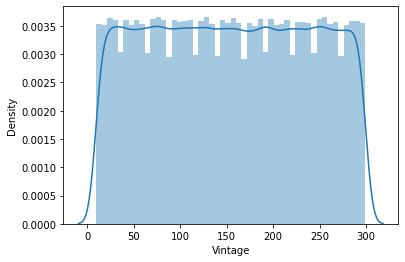

In [25]:
sns.distplot(train_data.Vintage)

<h2> Converting the Gender into integer value Female='0' and Male='1' </h2>

In [26]:
train_data['Gender'] = train_data['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [27]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,3.806662,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,4.343805,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,3.871201,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,3.091042,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,3.401197,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


<h2> Creating Dummy indicator columns</h2>

In [28]:
train_data=pd.get_dummies(train_data,drop_first=True)

In [29]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,3.806662,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,4.343805,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,3.871201,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,3.091042,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,3.401197,1,41.0,1,27496.0,152.0,39,0,1,0,0


<h2> Renaming "Vehicle_Age_< 1 Year" as "Vehicle_Age_lt_1_Year"; "Vehicle_Age_> 2 Years" as "Vehicle_Age_gt_2_Years </h2>

In [30]:
train_data=train_data.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train_data['Vehicle_Age_lt_1_Year']=train_data['Vehicle_Age_lt_1_Year'].astype('int')
train_data['Vehicle_Age_gt_2_Years']=train_data['Vehicle_Age_gt_2_Years'].astype('int')
train_data['Vehicle_Damage_Yes']=train_data['Vehicle_Damage_Yes'].astype('int')

For test data

In [31]:
test_data['Gender'] = test_data['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
test_data=pd.get_dummies(test_data,drop_first=True)
test_data=test_data.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
test_data['Vehicle_Age_lt_1_Year']=test_data['Vehicle_Age_lt_1_Year'].astype('int')
test_data['Vehicle_Age_gt_2_Years']=test_data['Vehicle_Age_gt_2_Years'].astype('int')
test_data['Vehicle_Damage_Yes']=test_data['Vehicle_Damage_Yes'].astype('int')

In [32]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,3.806662,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,4.343805,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,3.871201,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,3.091042,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,3.401197,1,41.0,1,27496.0,152.0,39,0,1,0,0


<h2>Scaling the data (Age, Vintage and Annual Premium)</h2>

In [33]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler


numeric_features = ['Age','Vintage']


ss = StandardScaler()
train_data[numeric_features] = ss.fit_transform(train_data[numeric_features])

In [34]:
mm = MinMaxScaler()
train_data[['Annual_Premium']] = mm.fit_transform(train_data[['Annual_Premium']])

In [35]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,1,0.513790,1,28.0,0,0.638245,26.0,0.748795,1,0,1,1
1,2,1,1.926093,1,3.0,0,0.521510,26.0,0.342443,0,0,0,0
2,3,1,0.683481,1,28.0,0,0.601797,26.0,-1.521998,1,0,1,1
3,4,1,-1.367780,1,11.0,1,0.438540,152.0,0.581474,0,1,0,0
4,5,0,-0.552294,1,41.0,1,0.419591,152.0,-1.378580,0,1,0,0


In [36]:
test_data[numeric_features] = ss.transform(test_data[numeric_features])

In [37]:
mm = MinMaxScaler()
test_data[['Annual_Premium']] = mm.fit_transform(test_data[['Annual_Premium']])

<h2>Drop 'id' column</h2>

In [38]:
train_data=train_data.drop('id',axis=1)

In [39]:
id=test_data.id
test_data=test_data.drop('id',axis=1)

<h2> Correlation of features </h2>

<AxesSubplot:>

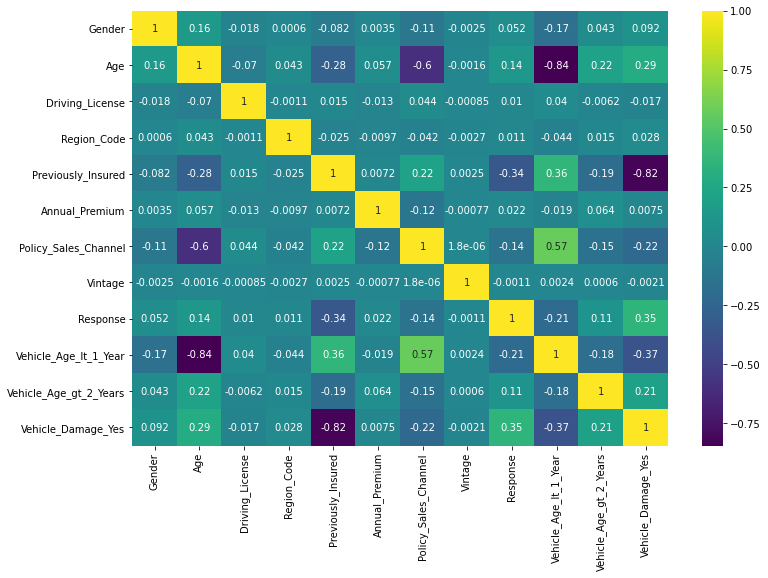

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

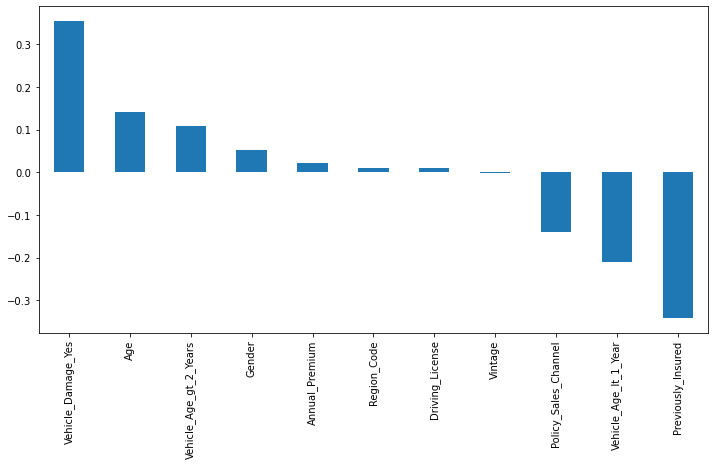

In [41]:
plt.figure(figsize=(12,6))
train_data.corr()['Response'].drop('Response').sort_values(ascending=False).plot(kind='bar')

# <h2> Cross Validation<h2>

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score, KFold, StratifiedKFold

cv = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold= KFold(n_splits=10, shuffle=True,random_state=0)

<h2>Train test split</h2>

In [44]:
from sklearn.model_selection import train_test_split

train_target=train_data['Response']
train_data=train_data.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train_data,train_target, random_state = 0)

<h3>SMOTE (Synthetic Minority Over-sampling Technique) is a type of over-sampling procedure that is used to correct the imbalances in the groups. This technique creates new data instances of the minority groups by copying existing minority instances and making small changes to them.</h3>

In [45]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_sample(x_train, y_train)

In [46]:
from sklearn.decomposition import PCA
pca = PCA()               # All components
#pca = PCA(n_components=1)  # 1 components
#pca = PCA(n_components=2) # 2 components
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
#print(pca)
#print(X_train)

In [47]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.50730776e-01 4.85181947e-02 3.00436061e-04 2.21494417e-04
 9.38103732e-05 7.25443390e-05 2.13537096e-05 1.67928928e-05
 1.50659933e-05 9.02686877e-06 5.04662686e-07]


In [48]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
#print(integer_encoded)

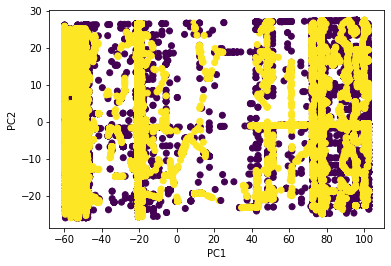

In [49]:
plt.scatter(x_train[:,0], x_train[:,1], c = integer_encoded)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# <center>Deep Neural Network</center>

In [50]:
#Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from keras import backend as K

In [51]:
DNN = Sequential()


DNN.add(Dense(128, activation='relu', input_shape= (x_train.shape[1],)))  #input

DNN.add(Dense(84, activation='relu')) #hidden

DNN.add(Dense(64, activation='relu')) #hidden

DNN.add(Dense(20, activation='relu')) #hidden

DNN.add(Dense(units=1, activation='sigmoid')) #output

In [52]:
opt = Adam(learning_rate=0.01)
DNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

19 Epochs, Batch size 128

In [53]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=11)


DNN.fit(x=x_train, y=y_train, epochs=100, batch_size=128, verbose=1, shuffle=True, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
3919/3919 [==============================] - 7s 2ms/step - loss: 0.4431 - accuracy: 0.7828 - val_loss: 0.5205 - val_accuracy: 0.6757
Epoch 2/100
3919/3919 [==============================] - 6s 2ms/step - loss: 0.4241 - accuracy: 0.7954 - val_loss: 0.4878 - val_accuracy: 0.6894
Epoch 3/100
3919/3919 [==============================] - 7s 2ms/step - loss: 0.4213 - accuracy: 0.7973 - val_loss: 0.4605 - val_accuracy: 0.7080
Epoch 4/100
3919/3919 [==============================] - 7s 2ms/step - loss: 0.4196 - accuracy: 0.7983 - val_loss: 0.4710 - val_accuracy: 0.7013
Epoch 5/100
3919/3919 [==============================] - 7s 2ms/step - loss: 0.4177 - accuracy: 0.8001 - val_loss: 0.4563 - val_accuracy: 0.7036
Epoch 6/100
3919/3919 [==============================] - 7s 2ms/step - loss: 0.4163 - accuracy: 0.8009 - val_loss: 0.4739 - val_accuracy: 0.7022
Epoch 7/100
3919/3919 [==============================] - 8s 2ms/step - loss: 0.4153 - accuracy: 0.8019 - val_loss: 0.4802 - val_ac

In [54]:
pred = DNN.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


<h3>Classification report of DNN</h3>

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, \
    recall_score, classification_report, precision_score

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     83603
           1       0.28      0.90      0.43     11675

    accuracy                           0.71     95278
   macro avg       0.63      0.79      0.62     95278
weighted avg       0.89      0.71      0.76     95278



In [56]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
confusion = confusion_matrix(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)
print('F1 Score: ', f1)

Accuracy:  0.7061546212137114
Recall:  0.8991862955032119
Precision:  0.2813119674151884
F1 Score:  0.42855101749229474


In [58]:
accuracies = cross_val_score(DNN, X = train_data, y= train_target, scoring="accuracy", cv=cv, n_jobs=-1)

TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x00000252E7486EE0>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

<h3>AUC-ROC Curve of DNN</h3>

In [60]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, plot_confusion_matrix,precision_score

In [61]:
def plot_ROC(fpr, tpr, m_name):
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 6))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc, alpha=0.5)
    
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.5)
    
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(True)
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic for %s'%m_name, fontsize=20)
    plt.legend(loc="lower right", fontsize=16)
    plt.show()

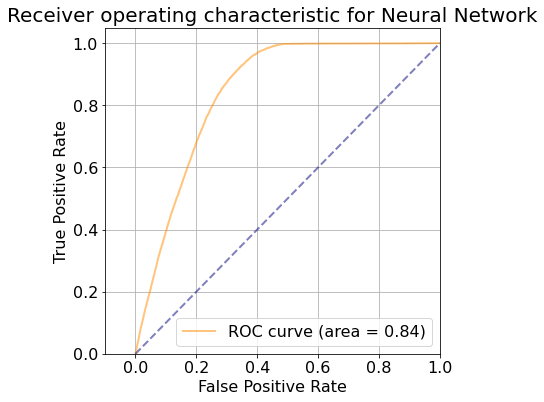

Area under curve (AUC):  0.8446947164201484


In [62]:
NN_Pred = DNN.predict(x_test)

(fpr, tpr, thresholds) = roc_curve(y_test, NN_Pred)
plot_ROC(fpr, tpr, 'Neural Network')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

<h3>Confusion matrix of DNN</h3>

<AxesSubplot:>

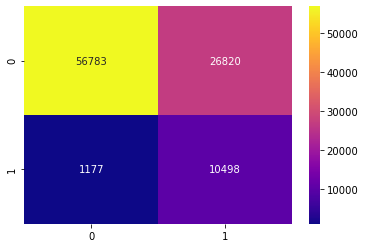

In [63]:
sns.heatmap(confusion,cmap="plasma",fmt="d",annot=True)

In [64]:
# print('confusion matrix:')
# print(confusion)

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
tn, fp, fn, tp

(56783, 26820, 1177, 10498)

# <center>Logistic Regression<center>

In [65]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
LogPred = logmodel.predict(x_test)

In [67]:
LogPredProb = logmodel.predict_proba(x_test)[:,1]

<h3>AUC-ROC Curve of Logistic Regression</h3>

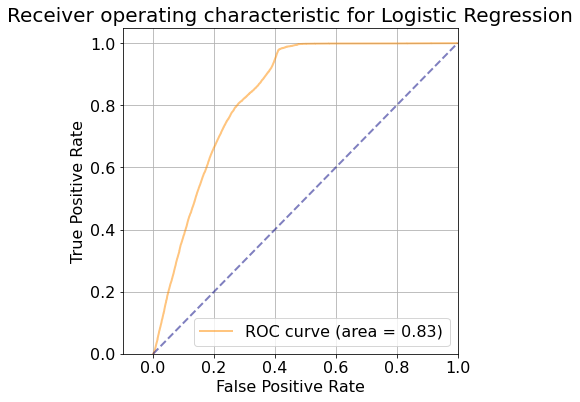

In [68]:
(fpr, tpr, thresholds) = roc_curve(y_test, LogPredProb)
plot_ROC(fpr, tpr,'Logistic Regression')

<h3>Confusion matrix of Logistic Regression</h3>

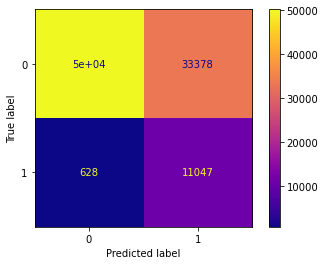

In [69]:
plot_confusion_matrix(logmodel, x_test, y_test, cmap=plt.cm.plasma)
plt.grid(False)
plt.show()

<h3>Classification Report of Loigstic Regression</h3>

In [70]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
accuracy = accuracy_score(y_test, LogPred)
precision = precision_score(y_test, LogPred)
recall = recall_score(y_test, LogPred)
f1 = f1_score(y_test, LogPred)

print('accuracy: ', accuracy)
print('recall: ', recall)
print('precision: ', precision)
print('f1_score: ', f1)

accuracy:  0.6430865467369172
recall:  0.9462098501070664
precision:  0.24866629150253236
f1_score:  0.3938324420677362


In [72]:
accuracies = cross_val_score(estimator = logmodel, X = train_data, y= train_target, scoring="accuracy", cv=cv, n_jobs=-1)

In [73]:
accuracies

array([0.87643987, 0.87662355, 0.87670226, 0.87649235, 0.87683346,
       0.8768597 , 0.87664979, 0.87657107, 0.87675474, 0.87662031])

In [74]:
accuracies.mean()

0.8766547102419502

In [75]:
print(classification_report(y_test,LogPred))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75     83603
           1       0.25      0.95      0.39     11675

    accuracy                           0.64     95278
   macro avg       0.62      0.77      0.57     95278
weighted avg       0.90      0.64      0.70     95278



# <center>Decision Tree<center>

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
dtreePred = dtree.predict(x_test)

In [78]:
dtreePredProb = dtree.predict_proba(x_test)[:,1]

<h3>AUC-ROC Curve of Decision Tree</h3>

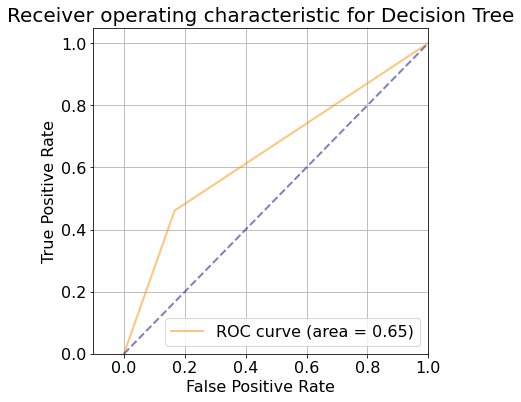

In [79]:
(fpr, tpr, thresholds) = roc_curve(y_test, dtreePredProb)
plot_ROC(fpr, tpr,'Decision Tree')

<h3> Confusion matrix of Decision Tree </h3>

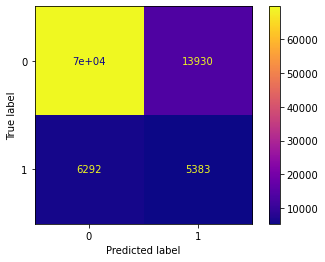

In [80]:
plot_confusion_matrix(dtree, x_test, y_test, cmap=plt.cm.plasma)
plt.grid(False)
plt.show()

In [81]:
accuracy = accuracy_score(y_test, dtreePred)
precision = precision_score(y_test, dtreePred)
recall = recall_score(y_test, dtreePred)
f1 = f1_score(y_test, dtreePred)

print('accuracy: ', accuracy)
print('recall: ', recall)
print('precision: ', precision)
print('f1_score: ', f1)

accuracy:  0.7877579294275698
recall:  0.46107066381156314
precision:  0.27872417542587896
f1_score:  0.34742480960371763


In [82]:
accuracies = cross_val_score(estimator = dtree, X = train_data, y= train_target, scoring="accuracy", cv=cv, n_jobs=-1)

In [83]:
accuracies

array([0.82104904, 0.82422398, 0.82354176, 0.82154758, 0.82406654,
       0.82448637, 0.82304322, 0.82220356, 0.82333185, 0.82017843])

In [84]:
accuracies.mean()

0.8227672330257167

<h3> Classification Report of Decision tree </h3>

In [85]:
print(classification_report(y_test,dtreePred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87     83603
           1       0.28      0.46      0.35     11675

    accuracy                           0.79     95278
   macro avg       0.60      0.65      0.61     95278
weighted avg       0.84      0.79      0.81     95278



# <center> Random Forest <center>

In [86]:
from sklearn.ensemble import RandomForestClassifier
Rtree = RandomForestClassifier(n_estimators=300)
Rtree.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [87]:
Rtreepred = Rtree.predict(x_test)

In [88]:
RtreepredProb =  Rtree.predict_proba(x_test)[:,1]

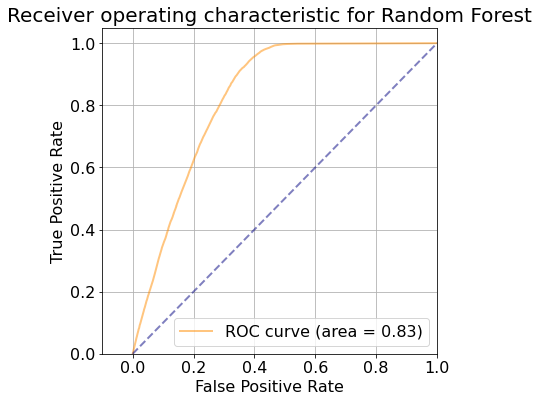

In [89]:
(fpr, tpr, thresholds) = roc_curve(y_test, RtreepredProb)
plot_ROC(fpr, tpr,'Random Forest')

<h3> Confusion matrix of Random Forest </h3>

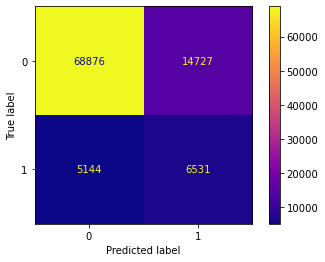

In [90]:
plot_confusion_matrix(Rtree, x_test, y_test, cmap=plt.cm.plasma)
plt.grid(False)
plt.show()

In [91]:
accuracy = accuracy_score(y_test, Rtreepred)
precision = precision_score(y_test, Rtreepred)
recall = recall_score(y_test, Rtreepred)
f1 = f1_score(y_test, Rtreepred)

print('accuracy: ', accuracy)
print('recall: ', recall)
print('precision: ', precision)
print('f1_score: ', f1)

accuracy:  0.7914418858498289
recall:  0.5594004282655246
precision:  0.3072255151001976
f1_score:  0.39662344760574497


In [92]:
accuracies = cross_val_score(estimator = Rtree, X = train_data, y= train_target, scoring="accuracy", cv=cv, n_jobs=-1)

In [93]:
accuracies

array([0.86510456, 0.86639028, 0.86733489, 0.86505208, 0.86607541,
       0.86717746, 0.86780719, 0.86636404, 0.86618037, 0.86559958])

In [94]:
accuracies.mean()

0.866308587021018

<h3>Classification report of Random Forest</h3>

In [95]:
print(classification_report(y_test,Rtreepred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     83603
           1       0.31      0.56      0.40     11675

    accuracy                           0.79     95278
   macro avg       0.62      0.69      0.64     95278
weighted avg       0.85      0.79      0.82     95278



# <center>XGBoost</center>

In [96]:
import xgboost as xgb

xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
XGBpred = xgb_model.predict_proba(x_test)[:,1]

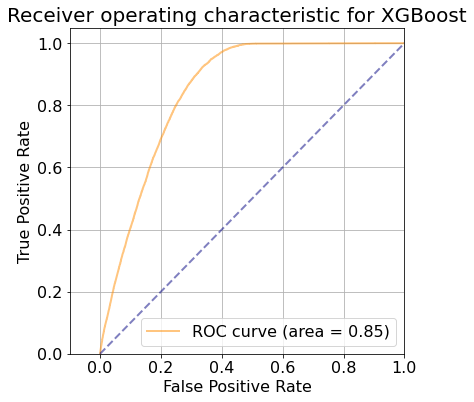

In [98]:
(fpr, tpr, thresholds) = roc_curve(y_test, XGBpred)
plot_ROC(fpr, tpr,'XGBoost')

<h3>Confusion matrix of XGBoost</h3>

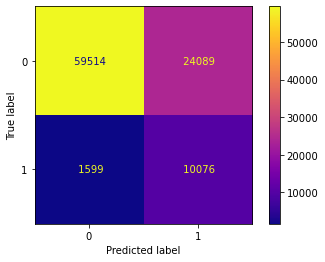

In [99]:
plot_confusion_matrix(xgb_model, x_test, y_test, cmap=plt.cm.plasma, values_format = " ")
plt.grid(False)
plt.show()

In [100]:
accuracy = accuracy_score(y_test, XGBpred>0.5)
precision = precision_score(y_test, XGBpred>0.5)
recall = recall_score(y_test, XGBpred>0.5)
f1 = f1_score(y_test, XGBpred>0.5)

print('accuracy: ', accuracy)
print('recall: ', recall)
print('precision: ', precision)
print('f1_score: ', f1)

accuracy:  0.7303889670228174
recall:  0.8630406852248395
precision:  0.2949217034977316
f1_score:  0.4396160558464224


In [101]:
accuracies = cross_val_score(estimator = xgb_model, X = train_data, y= train_target, scoring="accuracy", cv=cv, n_jobs=-1)

In [102]:
accuracies

array([0.87764687, 0.87646611, 0.87738448, 0.8769909 , 0.87712209,
       0.87714833, 0.87738448, 0.87675474, 0.8767285 , 0.87727631])

In [103]:
accuracies.mean()

0.8770902817462293

<h3>Classification Report of XGBoost</h3>

In [104]:
print(classification_report(y_test,XGBpred>0.5))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     83603
           1       0.29      0.86      0.44     11675

    accuracy                           0.73     95278
   macro avg       0.63      0.79      0.63     95278
weighted avg       0.89      0.73      0.78     95278



# <center> <u><i>VOTING CLASSIFIER<i><u> </center>

In [105]:
from sklearn.ensemble import VotingClassifier

In [106]:
clf1= DNN
clf2= logmodel
clf3= dtree
clf4= Rtree
clf5= xgb_model

labels=['Neural Network', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']


<h3>Hard voting classifier</h3>

In [107]:
VC= VotingClassifier([(labels[1], clf2), 
                      (labels[2], clf3), 
                      (labels[3], clf4),
                      (labels[4], clf5)], voting='hard')

In [108]:
VC= VC.fit(x_train, y_train)
y_predict= VC.predict(x_test)

C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Mainur Rahman\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg

[15:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<h3>Confusion matrix for Hard Voting Classifier</h3>

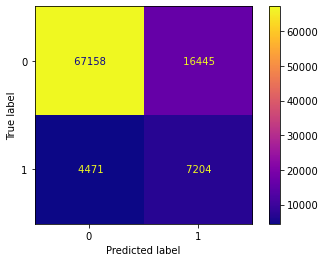

In [109]:
plot_confusion_matrix(VC, x_test, y_test, cmap=plt.cm.plasma, values_format = " ")
plt.grid(False)
plt.show()

In [110]:
# print(metrics.accuracy_score(y_test, y_predict))

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print('accuracy: ', accuracy)
print('recall: ', recall)
print('precision: ', precision)
print('f1_score: ', f1)

accuracy:  0.7804739814017927
recall:  0.6170449678800857
precision:  0.3046217599052814
f1_score:  0.40788132714301895


In [ ]:
accuracies = cross_val_score(estimator = VC, X = train_data, y= train_target, scoring="accuracy", cv=cv, n_jobs=-1)

In [ ]:
accuracies

In [ ]:
accuracies.mean()

<h3>Classification Report of Hard Voting Classifier</h3>

In [ ]:
print(classification_report(y_test, y_predict))

<h3>Soft Voting Classifier</h3>

In [ ]:
VC_soft= VotingClassifier([(labels[1], clf2), 
                      (labels[2], clf3), 
                      (labels[3], clf4),
                      (labels[4], clf5)], voting='soft')

In [ ]:
VC_soft= VC_soft.fit(x_train, y_train)
y_soft_predict= VC_soft.predict(x_test)

<h3>Confusion Matrix of Soft Voting Classifier</h3>

In [ ]:
plot_confusion_matrix(VC_soft, x_test, y_test, cmap=plt.cm.plasma, values_format = " ")
plt.grid(False)
plt.show()

In [ ]:
# print(metrics.accuracy_score(y_test, y_predict))

accuracy = accuracy_score(y_test, y_soft_predict)
precision = precision_score(y_test, y_soft_predict)
recall = recall_score(y_test, y_soft_predict)
f1 = f1_score(y_test, y_soft_predict)

print('accuracy: ', accuracy)
print('recall: ', recall)
print('precision: ', precision)
print('f1_score: ', f1)

In [ ]:
accuracies = cross_val_score(estimator = VC, X = train_data, y= train_target, scoring="accuracy", cv=cv, n_jobs=-1)

In [ ]:
accuracies

In [ ]:
accuracies.mean()

<h3>Classification report of Soft Voting Classifier</h3>

In [ ]:
print(classification_report(y_test, y_soft_predict))